# Code for creating a nice example fo the Fujiwara temperature sensing algorithm. 

Its really that, nothing more to say. 

In [2]:
import numpy as np
import matplotlib.pyplot as plot
import scipy.optimize as opt

In [3]:
def double_lorentz_function(x, A1, X01, sig1, A2, X02, sig2, offset): 
    
    # A1 = Amplitude 1, X01 = Resonance 1, sig1 = FWHM 1
    # A2 = Amplitude 2, X02 = Resonance 2, sig2 = FWHM 2, offset = offset
    
    first_peak = (A1/np.pi)*((sig1**2)/(sig1**2 +(2*x-2*X01)**2))
    second_peak = (A2/np.pi)*((sig2**2)/(sig2**2 +(2*x-2*X02)**2))
    
    return (first_peak + second_peak + offset)

In [4]:
def straight_line(x, m, c):
    
    y = m*x + c
    return(y)

In [5]:
def set_plot_params():
    # formats the plot parameters 
    plot.rcParams.update({'font.size' : 16})
    plot.rcParams.update({'figure.figsize' :[12, 8]})

In [12]:
def get_r_squared(x, y_data, y_fitting):
    # This is a function used to generate the goodness of fit metric r^2.
    # This value will be used to judge the effectiveness of the curve fitting 
    # used to find the resonant frequencies of the NV centre.
    
    y_data_mean = np.mean(y_data)
    SStot = np.sum((y_data - y_data_mean)**2) # Find the variation in experimental y values.
    SSres = np.sum((y_data - y_fitting)**2) # Find the variation betweem the experimental and fitted y values. 
    
    r_squared = 1 - (SSres/SStot) # Calculate R^2
    
    return(r_squared)

In [6]:
set_plot_params()

freq_array = np.linspace(2.83, 2.91, 800)

plot_parameters = [-0.21154414,  2.8640298,   0.00836018, -0.29904975,  2.8734495,   0.01460201, 1.00402059]

y = double_lorentz_function(freq_array, plot_parameters[0], plot_parameters[1],
                           plot_parameters[2], plot_parameters[3], plot_parameters[4], 
                           plot_parameters[5], plot_parameters[6])

negative_gradient_line = np.where((y[0:350] < 0.955) * (y[0:350] > 0.905))[0]
positive_gradient_line = np.where((y[400:-1] < 0.955) * (y[400:-1] > 0.905))[0] + 400

p = [-1, 1]

y_neg_coeffs, confidence = opt.curve_fit(straight_line, freq_array[negative_gradient_line], y[negative_gradient_line], 
                                            p)
y_pos_coeffs, confidence = opt.curve_fit(straight_line, freq_array[positive_gradient_line],  y[positive_gradient_line],
                                             p)

y_neg = straight_line(freq_array[negative_gradient_line], y_neg_coeffs[0], y_neg_coeffs[1])
y_pos = straight_line(freq_array[positive_gradient_line], y_pos_coeffs[0], y_pos_coeffs[1])

middle = 0.5 * (np.max(y_neg) + np.min(y_neg))

mid_point = np.abs(y_neg-middle).argmin() #+ negative_gradient_line[0]

mirror_point = np.abs(y_pos - y_neg[mid_point]).argmin() #+ positive_gradient_line[0]
print(mid_point, mirror_point)

y_points = [y_neg[mid_point], y_pos[mirror_point]]
f_points = [freq_array[negative_gradient_line[mid_point]], 
           freq_array[positive_gradient_line[mirror_point]]]

four_freqs = [freq_array[negative_gradient_line[mid_point]-10], freq_array[negative_gradient_line[mid_point+10]],
              freq_array[positive_gradient_line[mirror_point]-10], freq_array[positive_gradient_line[mirror_point+10]]]

four_freq_intensity = [y_neg[mid_point-10], y_neg[mid_point+10], 
                       y_pos[mirror_point-10],  y_pos[mirror_point+10]]

y_line_1 = np.linspace(0.89, four_freq_intensity[0], 100)
y_line_2 = np.linspace(0.89, four_freq_intensity[1], 100)

y_line_3 = np.linspace(0.89, four_freq_intensity[2], 100)
y_line_4 = np.linspace(0.89, four_freq_intensity[3], 100)

x1 = []
x2 = []
x3 = []
x4 = []

for i in range(len(y_line_1)):
    x1.append(four_freqs[0])
    x2.append(four_freqs[1])
    x3.append(four_freqs[2])
    x4.append(four_freqs[3])



20 30


(2.85, 2.89, 0.89, 0.99)

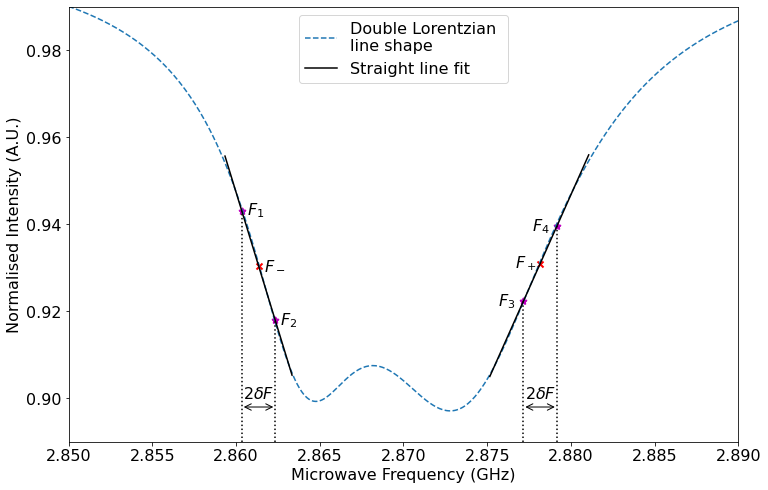

In [7]:
plot.plot(freq_array, y, linestyle = '--', label = 'Double Lorentzian \nline shape')
plot.xlabel('Microwave Frequency (GHz)')
plot.ylabel('Normalised Intensity (A.U.)')

plot.plot(freq_array[negative_gradient_line], y_neg, color = 'k', linestyle = '-', label = 'Straight line fit')
plot.plot(freq_array[positive_gradient_line], y_pos, color = 'k', linestyle = '-')

plot.scatter(f_points, y_points , marker = 'x', color = 'r', linewidth = '2')

plot.scatter(four_freqs, four_freq_intensity , marker = '*', color = 'm', linewidth = '2')
plot.legend()

plot.text(f_points[0] + 0.0003 , y_points[0] - 0.001, '$F_-$')
plot.text(f_points[1] - 0.0015 , y_points[1] - 0.001, '$F_+$')

plot.text(four_freqs[0] + 0.0003  , four_freq_intensity[0] - 0.001, '$F_1$')
plot.text(four_freqs[1] + 0.0003 , four_freq_intensity[1] - 0.001, '$F_2$')
plot.text(four_freqs[2] - 0.0015 , four_freq_intensity[2] - 0.001, '$F_3$')
plot.text(four_freqs[3] - 0.0015 , four_freq_intensity[3] - 0.001, '$F_4$')

plot.plot(x1, y_line_1, linestyle = ':', color = 'k')
plot.plot(x2, y_line_2, linestyle = ':', color = 'k')
plot.plot(x3, y_line_3, linestyle = ':', color = 'k')
plot.plot(x4, y_line_4, linestyle = ':', color = 'k')

plot.text(np.mean(four_freqs[0:1]) + 0.0001, 0.9, r'$2\delta F$')
plot.text(np.mean(four_freqs[2:3])+ 0.0001, 0.9, r'$2\delta F$')

plot.annotate(s='', xy=(four_freqs[0], 0.898), xytext=(four_freqs[1], 0.898), arrowprops=dict(arrowstyle='<->'))
plot.annotate(s='', xy=(four_freqs[2], 0.898), xytext=(four_freqs[3], 0.898), arrowprops=dict(arrowstyle='<->'))
#plot.show()
plot.axis([2.85, 2.89, 0.89, 0.99])

#plot.savefig('H:\\My Documents\\Strathclyde_Back_up\\Thesis and Planning\\Thesis_plots\\20210928\\' + 'Fuji_image_2.pdf')

intersection = -2.868162173914573
intersection = -2.8674175330386635


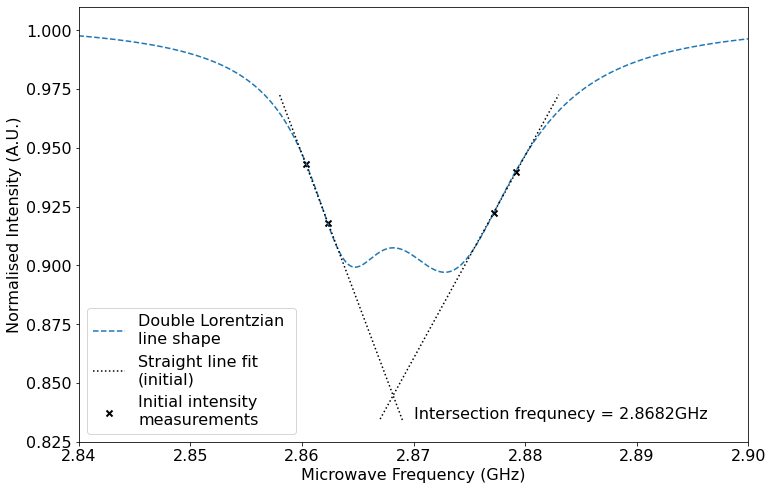

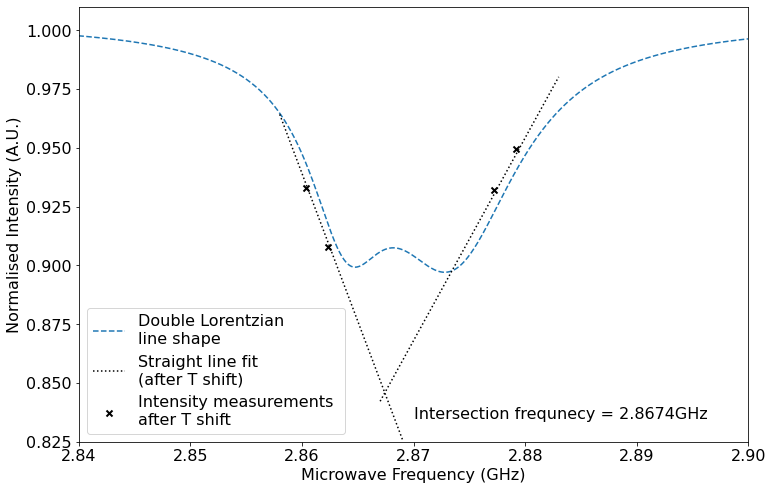

In [8]:
fig1, ax1 = plot.subplots()
plot.plot(freq_array, y, linestyle = '--', label = 'Double Lorentzian \nline shape')
plot.xlabel('Microwave Frequency (GHz)')
plot.ylabel('Normalised Intensity (A.U.)')
plot.axis([2.84, 2.9, 0.825, 1.01])

smaller_array_neg = np.linspace(2.858, 2.869, 100)
smaller_array_pos = np.linspace(2.867, 2.883, 100)

y1 = straight_line(smaller_array_neg, y_neg_coeffs[0], y_neg_coeffs[1])
y2 = straight_line(smaller_array_pos, y_pos_coeffs[0], y_pos_coeffs[1])
                                                                    

plot.plot(smaller_array_neg, y1, color = 'k', linestyle = ':', label = 'Straight line fit \n(initial)')
plot.plot(smaller_array_pos, y2, color = 'k', linestyle = ':')

plot.scatter(four_freqs, four_freq_intensity, marker = 'x', color = 'k', linewidth = '2', 
            label = 'Initial intensity \nmeasurements')

plot.legend()

print('intersection = ' + str((y_neg_coeffs[1] - y_pos_coeffs[1])/ (y_neg_coeffs[0]-y_pos_coeffs[0])))
plot.text(2.87, 0.835, 'Intersection frequnecy = 2.8682GHz')


fig2, ax2 = plot.subplots()
plot.axis([2.84, 2.9, 0.825, 1.01])
t_shift = np.array([four_freq_intensity[0] - 0.01, four_freq_intensity[1] - 0.01,
                   four_freq_intensity[2] + 0.01, four_freq_intensity[3] + 0.01])

m1 = (t_shift[1] - t_shift[0]) / (four_freqs[1] - four_freqs[0])
m2 = (t_shift[3] - t_shift[2]) / (four_freqs[3] - four_freqs[2])

plot.plot(freq_array, y, linestyle = '--', label = 'Double Lorentzian \nline shape')
plot.xlabel('Microwave Frequency (GHz)')
plot.ylabel('Normalised Intensity (A.U.)')

plot.scatter(four_freqs, t_shift, marker = 'x', color = 'k', linewidth = '2', 
            label = 'Intensity measurements \nafter T shift')

x1 = np.array([2.858, 2.869])
x2 = np.array([2.867, 2.883])

y1 = m1*x1 + 36.908
y2 = m2*x2 + -23.8858

plot.plot(x1, y1, color = 'k', linestyle = ':')
plot.plot(x2, y2, color = 'k', linestyle = ':', 
          label = 'Straight line fit \n(after T shift)')

plot.text(2.87, 0.835, 'Intersection frequnecy = 2.8674GHz')


plot.legend()
print('intersection = ' + str((36.908 + 23.8858)/ (m1-m2)))

#fig1.savefig('H:\\My Documents\\Strathclyde_Back_up\\Thesis and Planning\\Thesis_plots\\' + 'Kuscko_analysis_01' + '.pdf')
#fig2.savefig('H:\\My Documents\\Strathclyde_Back_up\\Thesis and Planning\\Thesis_plots\\' + 'Kuscko_analysis_02' + '.pdf')

293
333


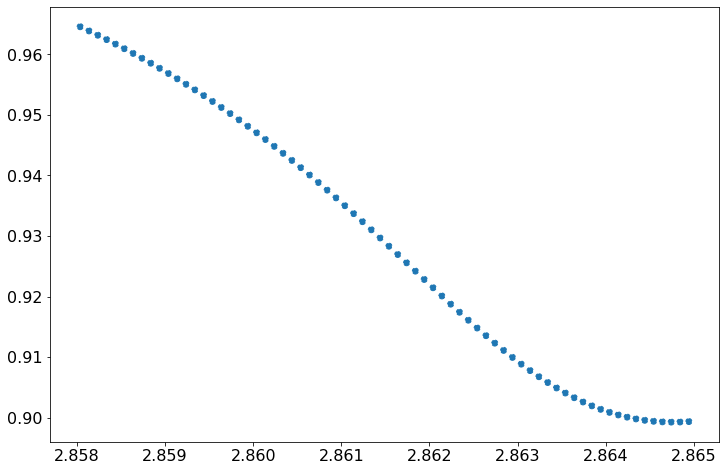

In [19]:
print(np.min(negative_gradient_line))
print(np.max(negative_gradient_line))

plot.scatter(freq_array[280:350], y[280:350], linestyle = '--', label = 'Double Lorentzian \nline shape')

0.9984513241466607
0.9556968625647073 1.000405722965634
-0.16339032357968641 0.0548164990363779


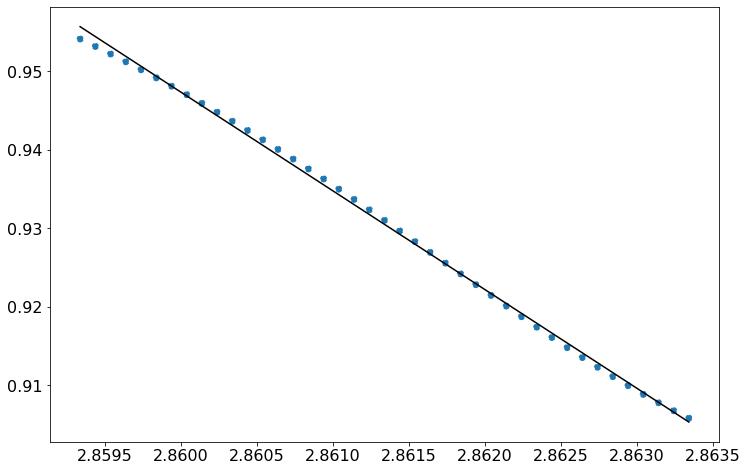

In [24]:
plot.scatter(freq_array[negative_gradient_line], y[negative_gradient_line], linestyle = '--', label = 'Double Lorentzian \nline shape')
plot.plot(freq_array[negative_gradient_line], y_neg, color = 'k', linestyle = '-', label = 'Straight line fit')

r = get_r_squared(freq_array[negative_gradient_line], y[negative_gradient_line],y_neg)
print(r)

a = 100*(y[negative_gradient_line[0]] - y_neg[0])/y_neg[0]
b = 100*(y[negative_gradient_line[-1]]  - y_neg[-1])/y_neg[-1]
print(y_neg[0], y[0])
print(a, b)

0.9989235922050549


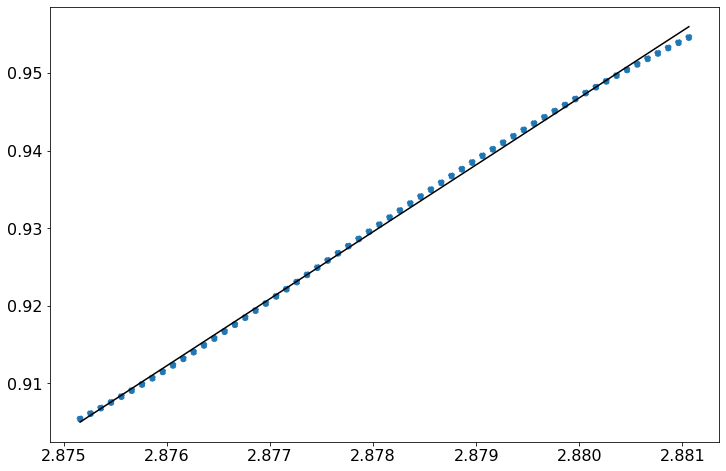

In [21]:
plot.scatter(freq_array[positive_gradient_line], y[positive_gradient_line], linestyle = '--', label = 'Double Lorentzian \nline shape')
plot.plot(freq_array[positive_gradient_line], y_pos, color = 'k', linestyle = '-', label = 'Straight line fit')

r = get_r_squared(freq_array[positive_gradient_line], y[positive_gradient_line], y_pos)
print(r)